In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from scipy.optimize import curve_fit, brentq
from scipy.stats import gamma
from gamma_case import gamma_shift, sim_gamma

In [20]:
theta_set = np.array([0.25, 0.5, 1, 3, 7, 10, 20, 30])
# for a_set we will choose scale = 2
k_set = np.array([0.5, 1, 2, 3, 5, 7, 9])
# for scale_set we will choose a = 2

# Chapter 1

In [21]:
def params_shift(params_set, mode = "theta"):
    """
    Visualize the initial parameters of gamma distribution 
    against the estimated ones
    
    @params_set {list} - set of parameters
    @mode {str} - mode of visualization
    """
    # Selection parameter for iteration
    mode_dict = {
        "theta": lambda p: gamma_shift(theta = p, k = 2, n_fol = 1000),  # p is interpreted as θ
        "k": lambda p: gamma_shift(theta = 2, k = p, n_fol = 1000),  # p is interpreted as k
    }

    func = mode_dict[mode]
    print(func)

    theta_set_prime = []
    k_set_prime = []
    for p in params_set:
        for i in range(30):
            res = func(p)
            theta_set_prime.append(res[0])
            k_set_prime.append(res[1])
    
    # Average the 30 repetitions for each parameter value.
    theta_set_prime = np.array(theta_set_prime).reshape(-1, 30).mean(axis=1)
    k_set_prime = np.array(k_set_prime).reshape(-1, 30).mean(axis=1)

    return theta_set_prime, k_set_prime
    


In [22]:
def func_to_fit_theta(theta, a, b, c):
    return a*theta**b + c 

In [23]:
def func_to_fit_k(k, a, b):
    return a*k + b

In [24]:
def params_shift_plot(params_set, mode):
    if mode == "theta":
        theta_set_prime, k_set_prime = params_shift(params_set, mode = mode)
        popt_theta, _ = curve_fit(func_to_fit_theta, params_set, theta_set_prime)
        popt_k, _ = curve_fit(func_to_fit_k, params_set, k_set_prime)
        y_fit_theta = func_to_fit_theta(params_set, *popt_theta)
        y_fit_k = func_to_fit_k(params_set, *popt_k)
        
        plt.scatter(params_set, theta_set_prime, label = "Estimated Value of θ")
        plt.scatter(params_set, k_set_prime, label = "Estimated Value of k")

    elif mode == "k":
        theta_set_prime, k_set_prime = params_shift(params_set, mode = mode)
        popt_k, _ = curve_fit(func_to_fit_k, params_set, k_set_prime)   
        popt_theta, _ = curve_fit(func_to_fit_k, params_set, theta_set_prime) 
        y_fit_k = func_to_fit_k(params_set, *popt_k) 
        y_fit_theta = func_to_fit_k(params_set, *popt_theta)

        plt.scatter(params_set, k_set_prime, label = "Estimated Value of k")
        plt.scatter(params_set, theta_set_prime, label = "Estimated Value of θ")
    
    else:
        raise ValueError("Invalid mode")

    plt.plot(params_set, y_fit_theta, label = f"Fit of θ")
    plt.plot(params_set, y_fit_k, label = f"Fit of k")

    plt.plot(params_set, params_set, linestyle = '--', label = f"True Value of {mode}")
    plt.xlabel("True Value of " + mode)
    plt.ylabel("Observed Value of" + mode)
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Gamma Shift: " + mode + " Parameter")

    print("Estimated Coefficients: ", popt_theta)
    print("Estimated Coefficients: ", popt_k)

    return plt

<function params_shift.<locals>.<lambda> at 0x7636a28bd120>
Estimated Coefficients:  [ 4.13589309  0.2410758  -2.95369905]
Estimated Coefficients:  [0.20251156 1.51750176]


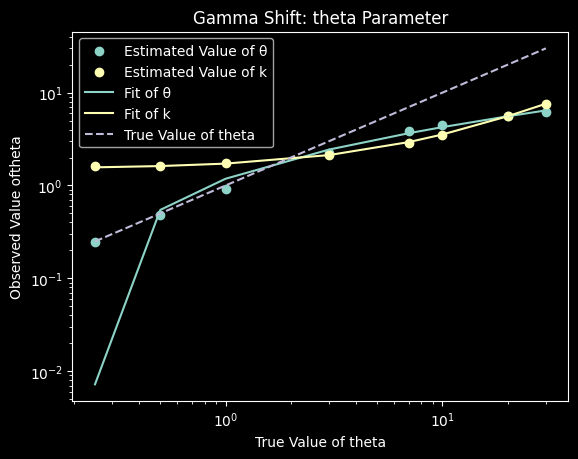

In [25]:
params_shift_plot(theta_set, "theta").show()

<function params_shift.<locals>.<lambda> at 0x7636f7f71e40>
Estimated Coefficients:  [5.91595752e-04 1.63272736e+00]
Estimated Coefficients:  [ 0.9634459  -0.00736849]


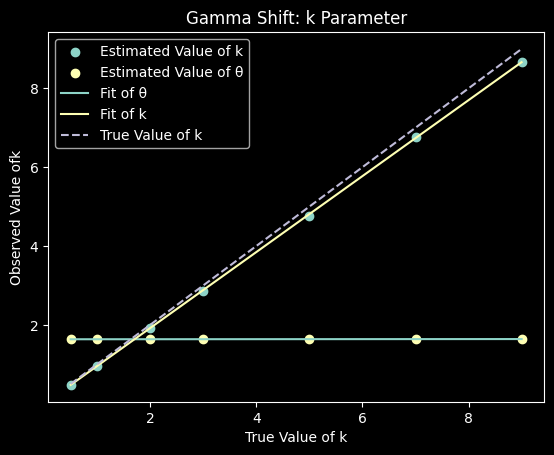

In [18]:
params_shift_plot(k_set, "k").show()

In [9]:
def big_r_gamma_est(theta, k, n_fol):
    theta_prime, k_prime, _ = gamma_shift(theta, k, n_fol)
    theta_est = ((theta_prime + 1.99) / 2.87)**(100/36)
    k_est = (k_prime - 0.02) / 0.95
    
    print(f"Shifted theta: {round(theta_prime, 3)}")
    print(f"Estimated theta: {round(theta_est, 3)}")
    print(f"True theta: {round(theta, 3)}")
    print(f"Theta difference: {round(theta_est - theta, 3)}")
    
    print(f"Shifted k: {round(k_prime, 3)}")
    print(f"Estimated k: {round(k_est, 3)}")
    print(f"True k: {round(k, 3)}")
    print(f"K difference: {round(k_est - k, 3)}")

In [10]:
big_r_gamma_est(2, 2, 1000)

Shifted theta: 1.573
Estimated theta: 1.824
True theta: 2
Theta difference: -0.176
Shifted k: 2.113
Estimated k: 2.203
True k: 2
K difference: 0.203


In [11]:
big_r_gamma_est(1, 1, 1000)

Shifted theta: 0.937
Estimated theta: 1.056
True theta: 1
Theta difference: 0.056
Shifted k: 0.861
Estimated k: 0.885
True k: 1
K difference: -0.115


In [12]:
for i in range(10):
    big_r_gamma_est(int(i) + 1, 2, 1000)
    print("\n")
    

Shifted theta: 0.921
Estimated theta: 1.04
True theta: 1
Theta difference: 0.04
Shifted k: 1.713
Estimated k: 1.782
True k: 2
K difference: -0.218


Shifted theta: 1.617
Estimated theta: 1.886
True theta: 2
Theta difference: -0.114
Shifted k: 1.86
Estimated k: 1.937
True k: 2
K difference: -0.063


Shifted theta: 2.149
Estimated theta: 2.766
True theta: 3
Theta difference: -0.234
Shifted k: 2.176
Estimated k: 2.269
True k: 2
K difference: 0.269


Shifted theta: 2.753
Estimated theta: 4.036
True theta: 4
Theta difference: 0.036
Shifted k: 2.342
Estimated k: 2.444
True k: 2
K difference: 0.444


Shifted theta: 3.322
Estimated theta: 5.529
True theta: 5
Theta difference: 0.529
Shifted k: 2.248
Estimated k: 2.345
True k: 2
K difference: 0.345


Shifted theta: 3.476
Estimated theta: 5.986
True theta: 6
Theta difference: -0.014
Shifted k: 2.687
Estimated k: 2.808
True k: 2
K difference: 0.808


Shifted theta: 3.694
Estimated theta: 6.673
True theta: 7
Theta difference: -0.327
Shifted k: 2.96

# Chapter 2

k_set = [0.5, 3, 10]
theta_set = [0.5, 3, 10]
theta_pred = []
for i, theta in enumerate(theta_set):
    ax = axes[i]
    plt.sca(ax) # set current axis
    theta_pred = [gamma_shift(theta, k, n_fol)[0] for rep in range(30)]

    